# Imports

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Results

In [2]:
results_dict_dir = "/Users/thodo/Documents/sxoli/diplomatiki/basic-block-energy-prediction/results/program_results.json"
with open(results_dict_dir) as json_file:
    results_dict = json.load(json_file)

In [3]:
benchmarks = results_dict.keys()
maes = {}

for benchmark in benchmarks:
    maes[benchmark] = {}
    models_preds = [model_preds for model_preds in results_dict[benchmark].keys() if model_preds.endswith("_preds")]
    for model_preds in models_preds:
        model = model_preds.rsplit("_", 1)[0]
        maes[benchmark][model] = mean_absolute_error(results_dict[benchmark]["labels"], results_dict[benchmark][model_preds])

# Bar Plots

In [4]:
maes_df = pd.DataFrame.from_records(
    [
        (benchmark, model, mae)
        for benchmark in benchmarks
        for model in maes[benchmark].keys()
        for mae in [maes[benchmark][model]]
    ],
    columns=["benchmark", "model", "MAE"],
)

In [5]:
px.bar(maes_df, x="benchmark", y="MAE", color="model", barmode="group")

# Histograms

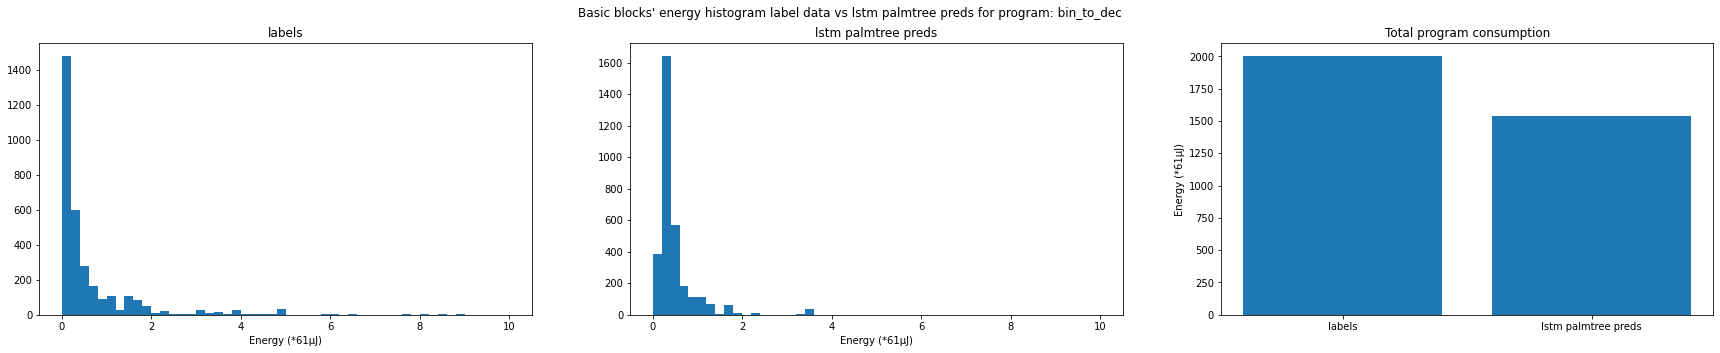

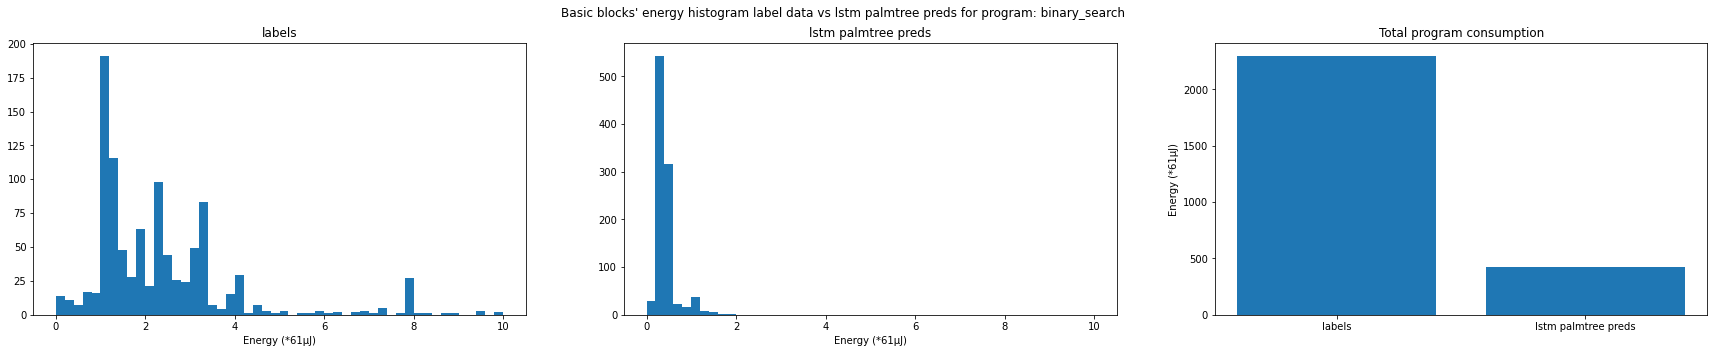

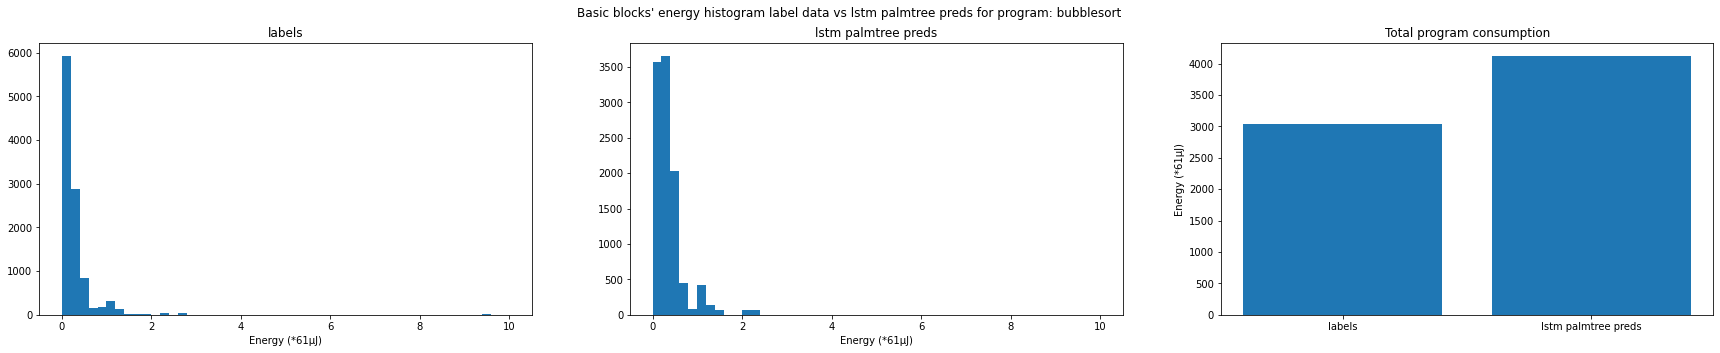

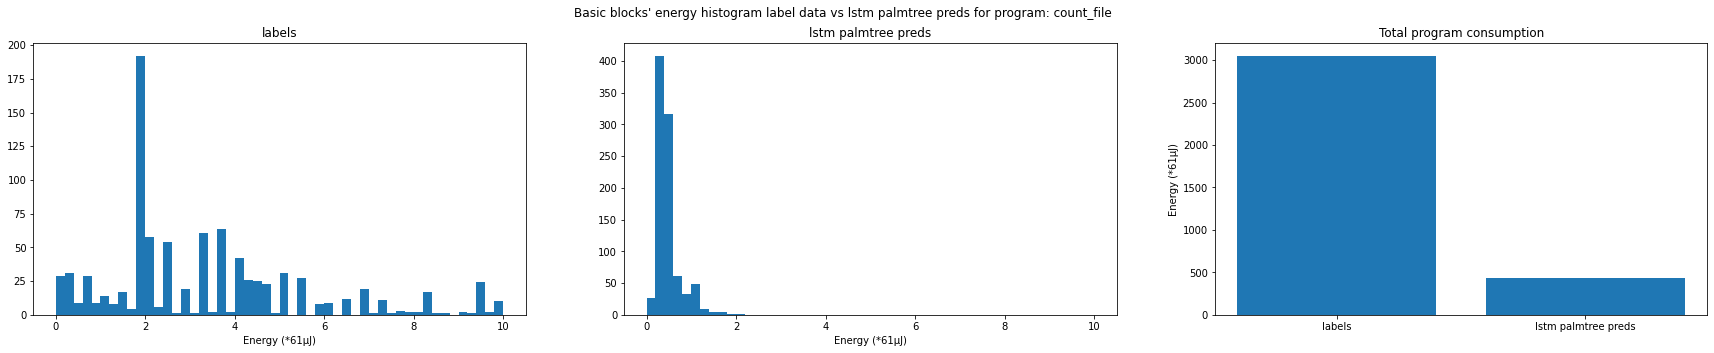

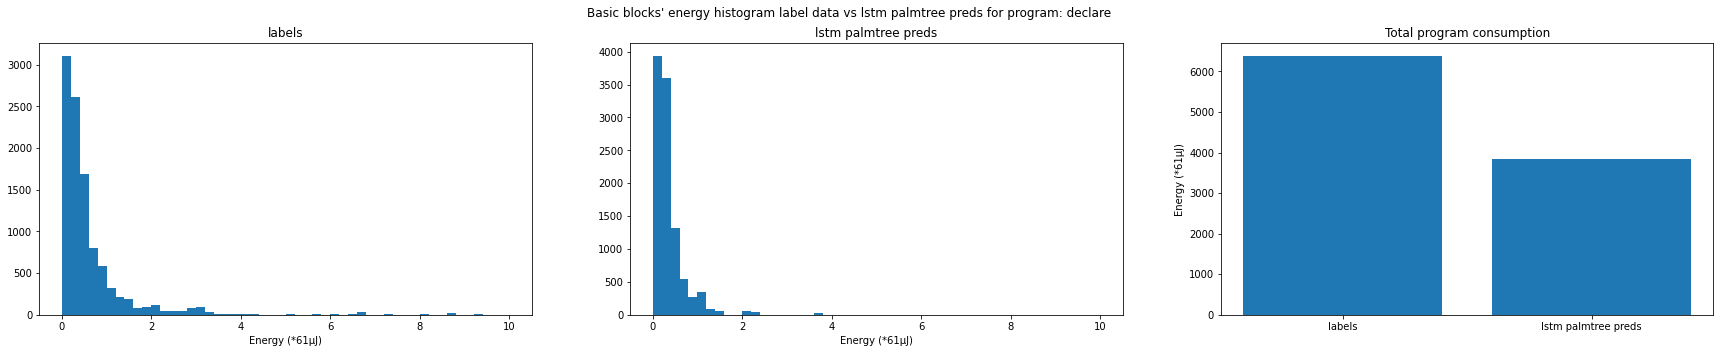

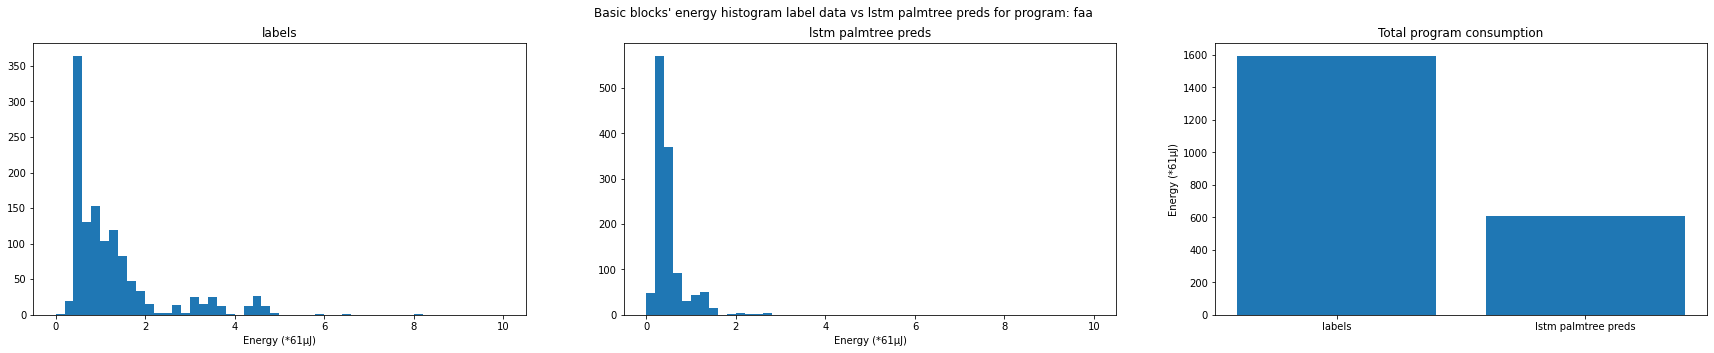

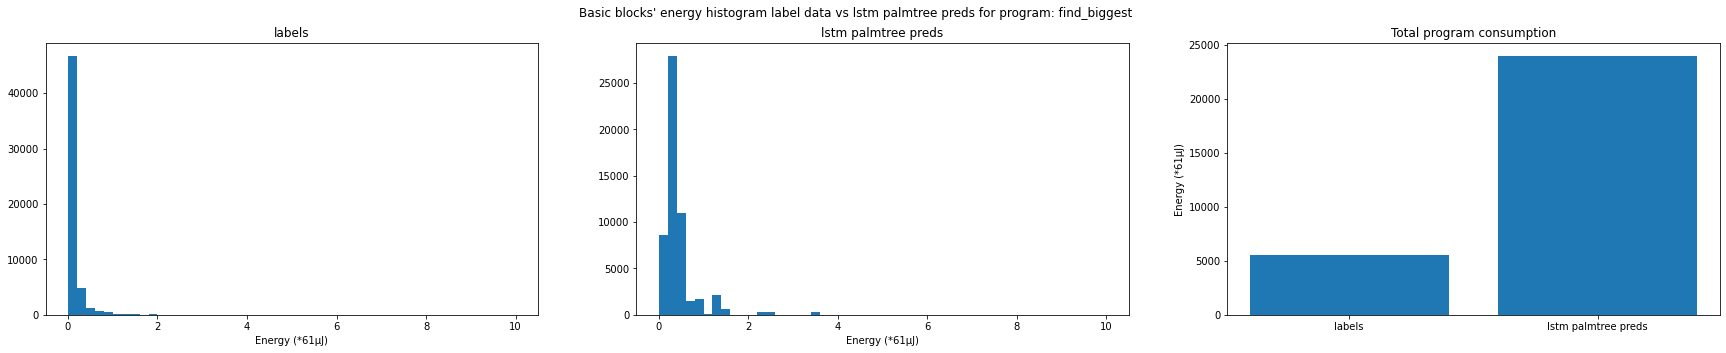

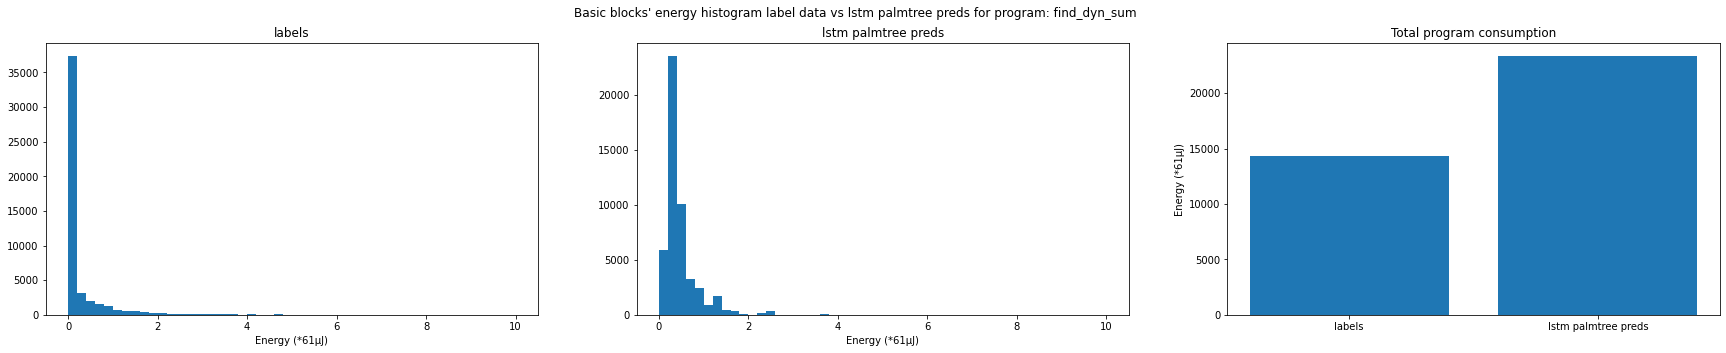

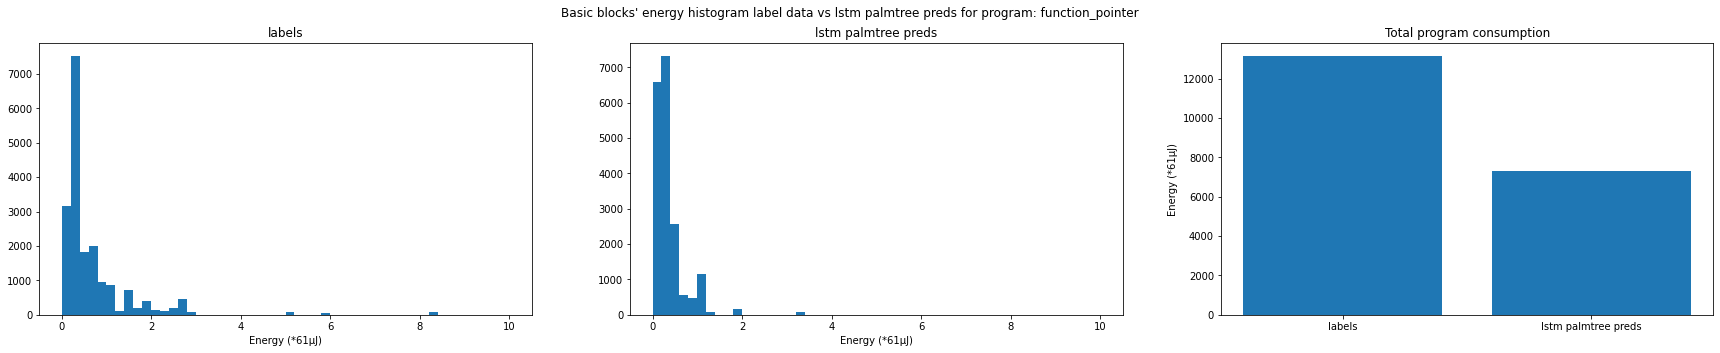

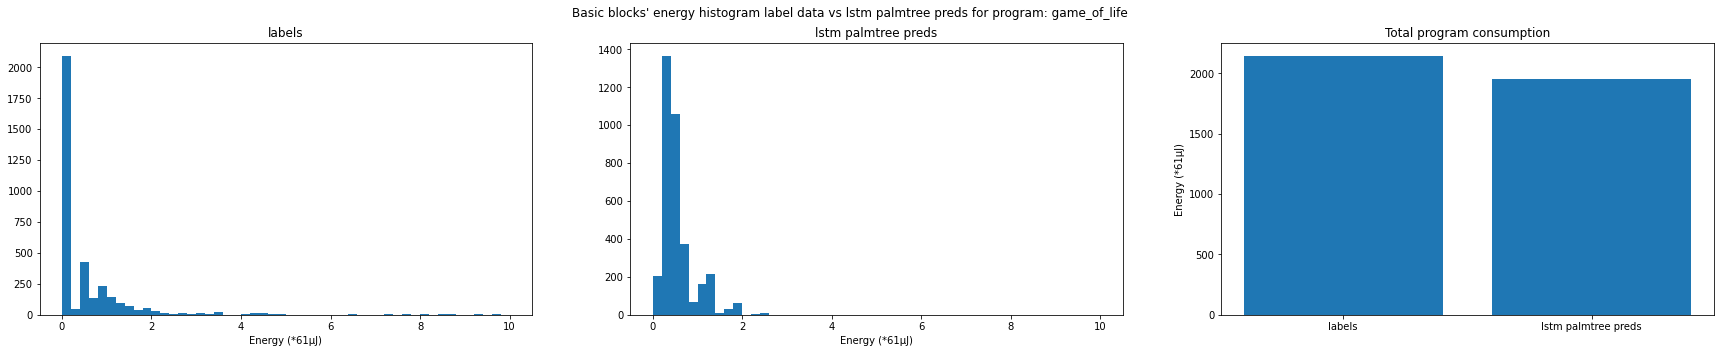

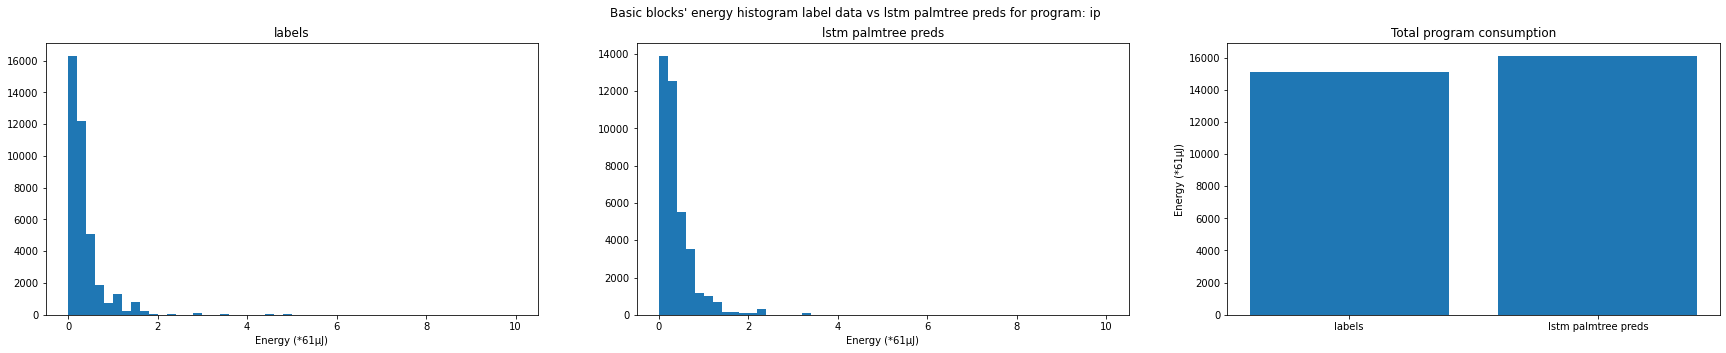

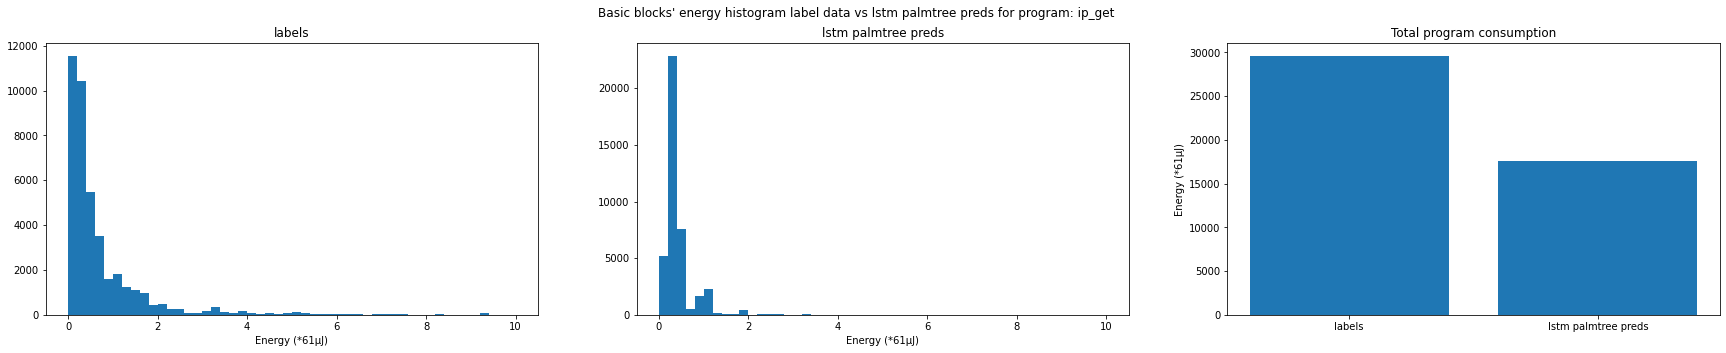

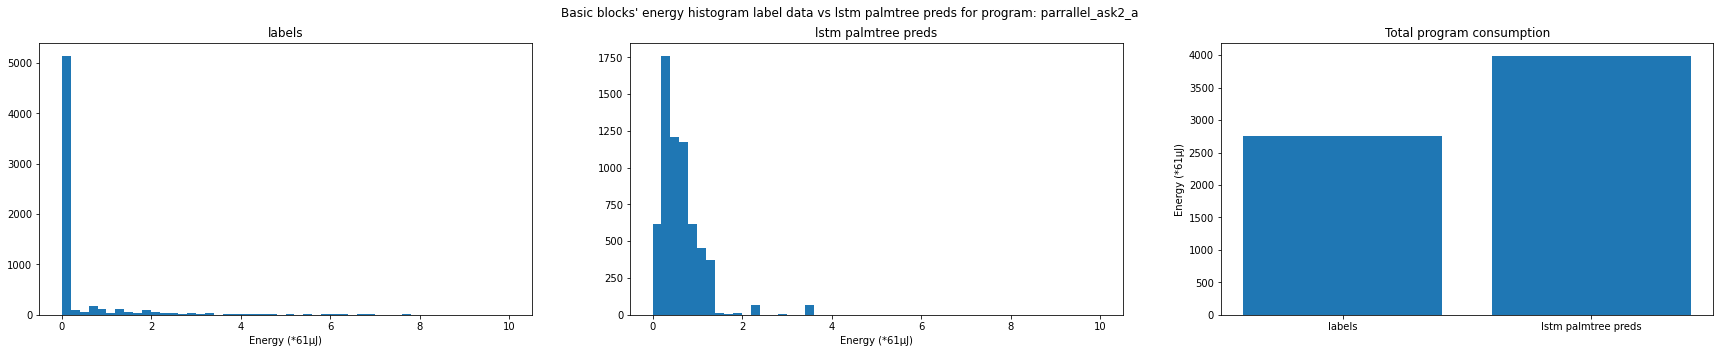

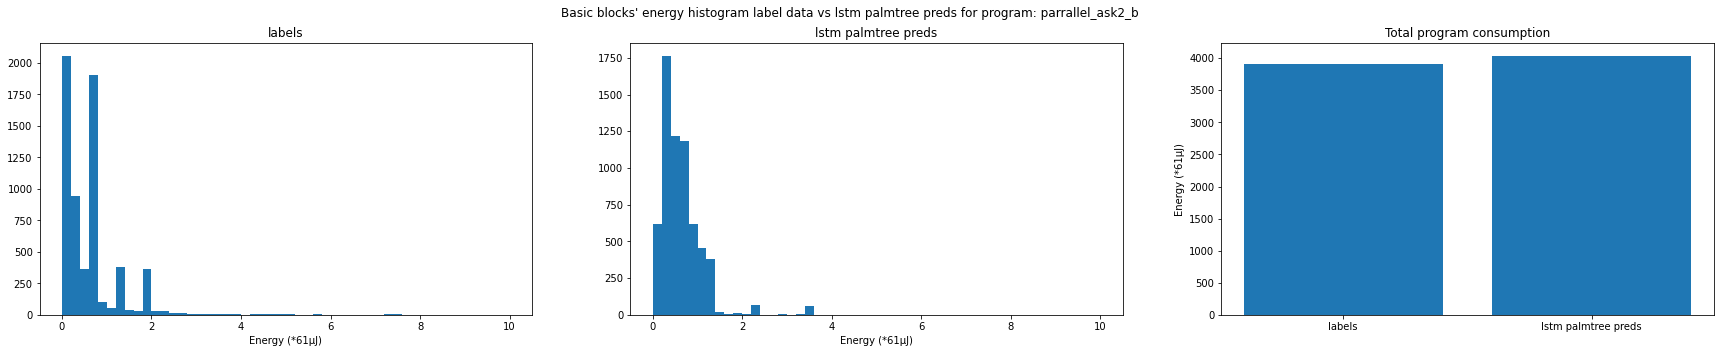

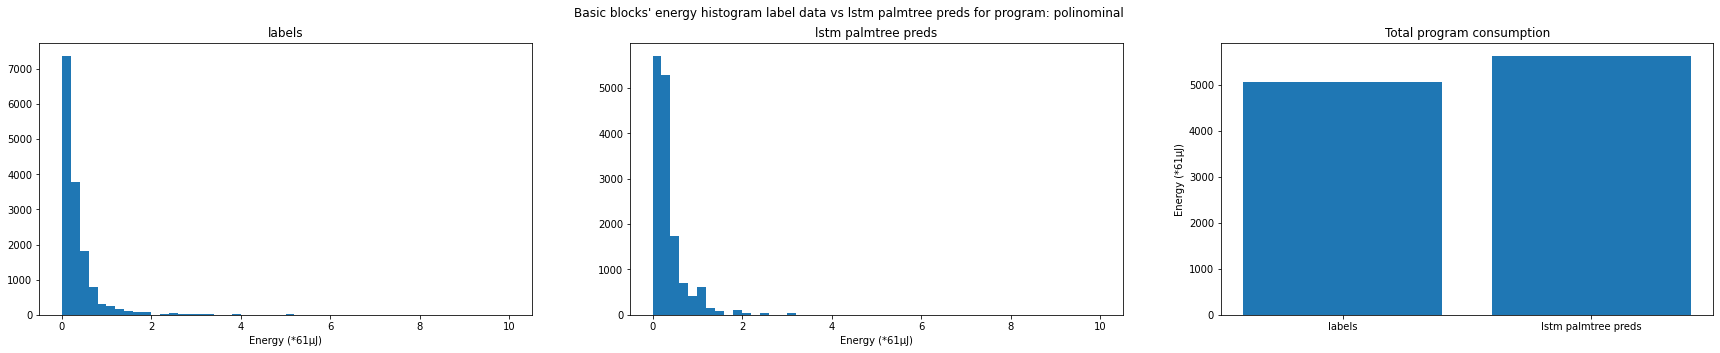

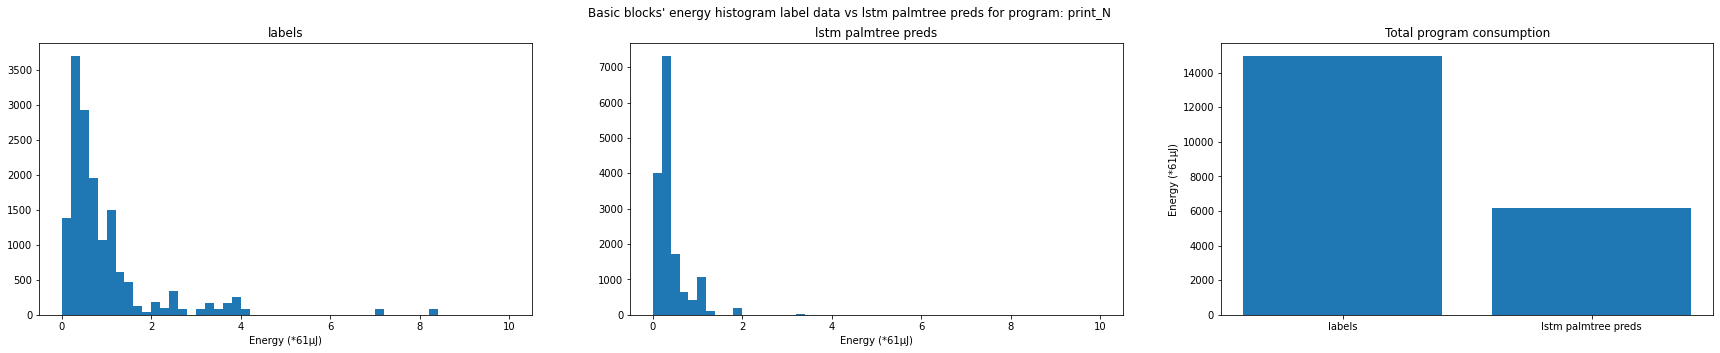

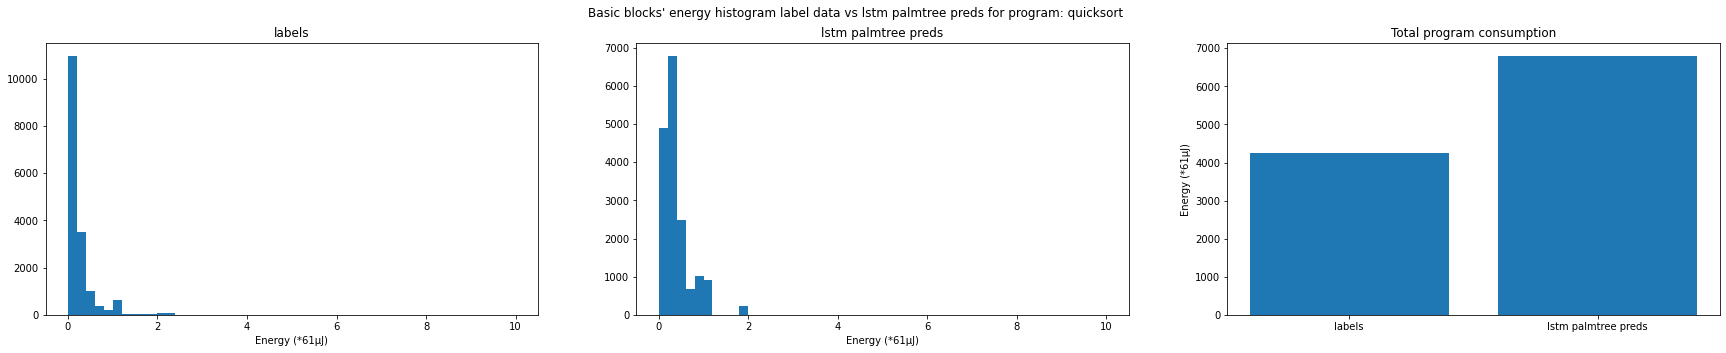

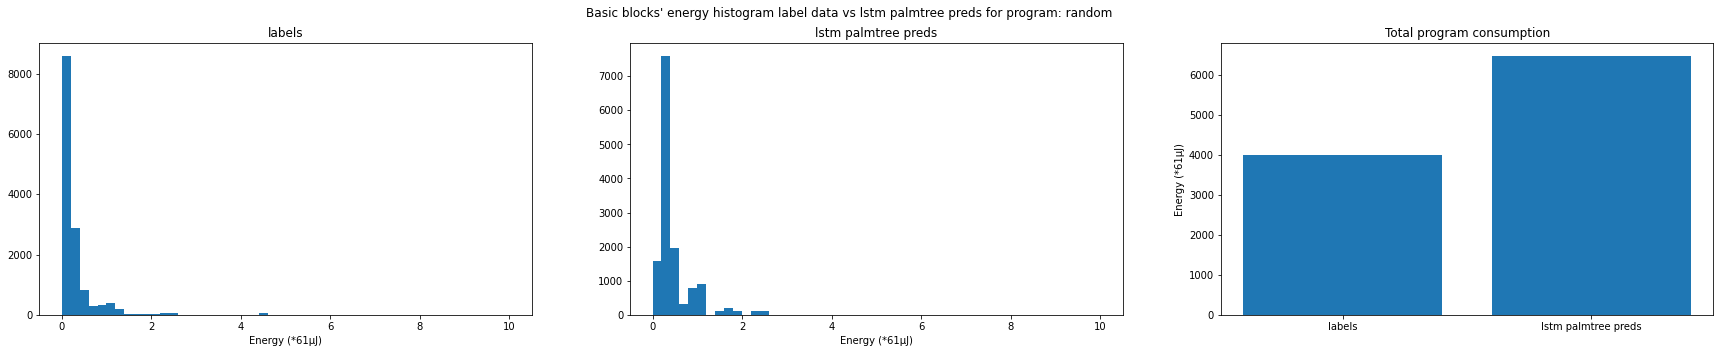

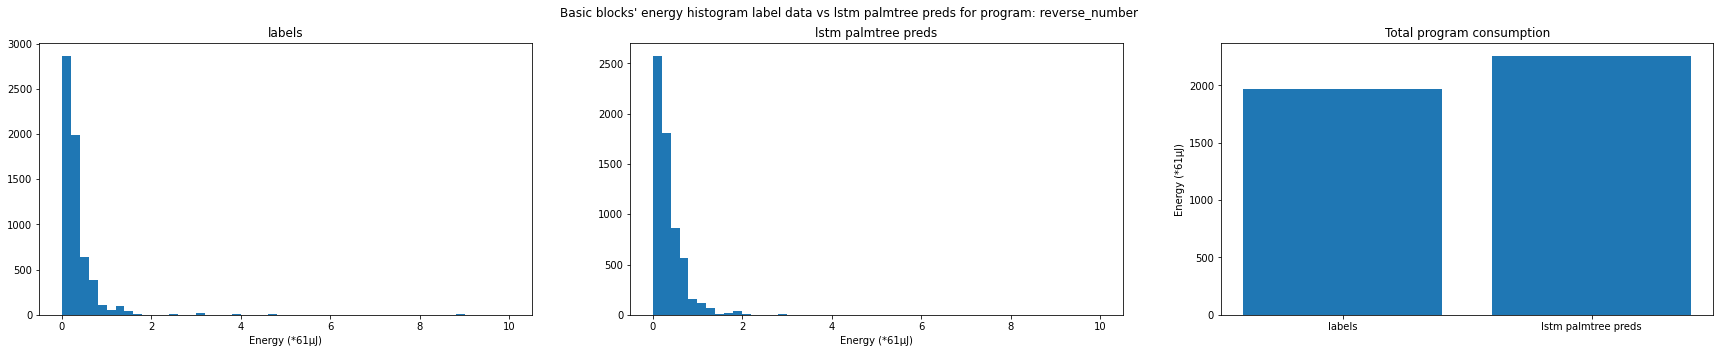

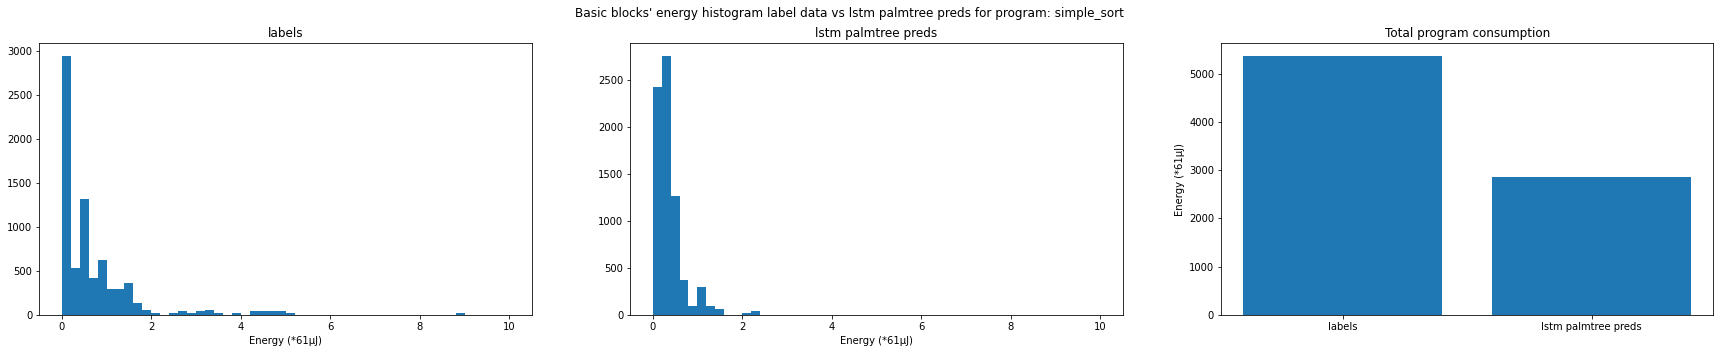

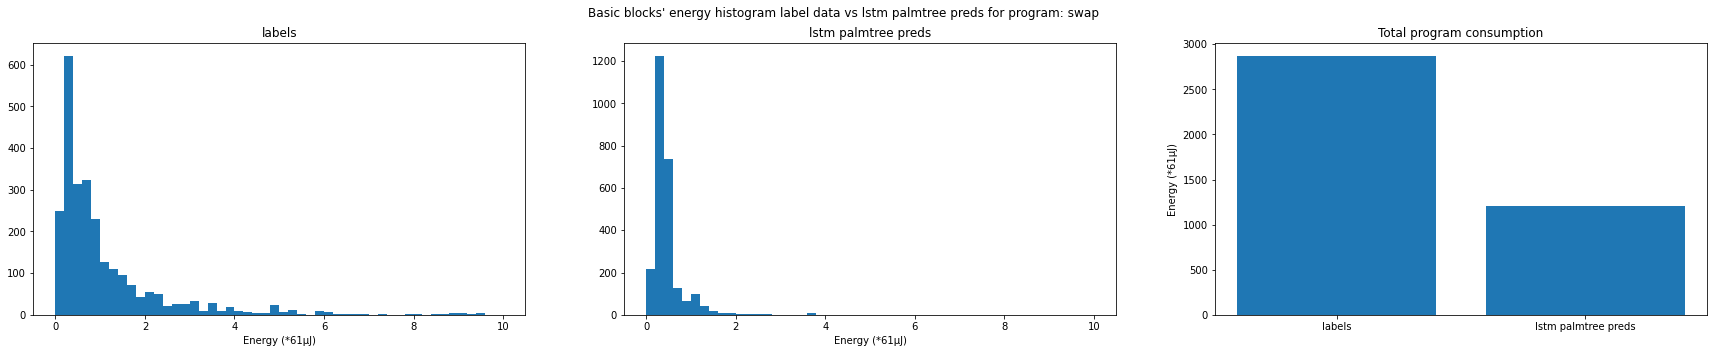

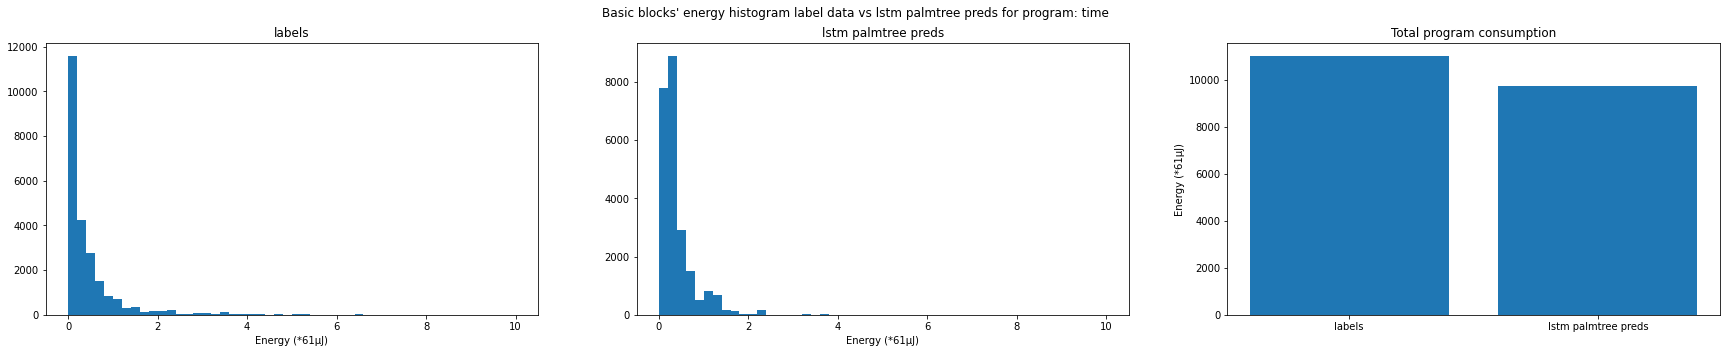

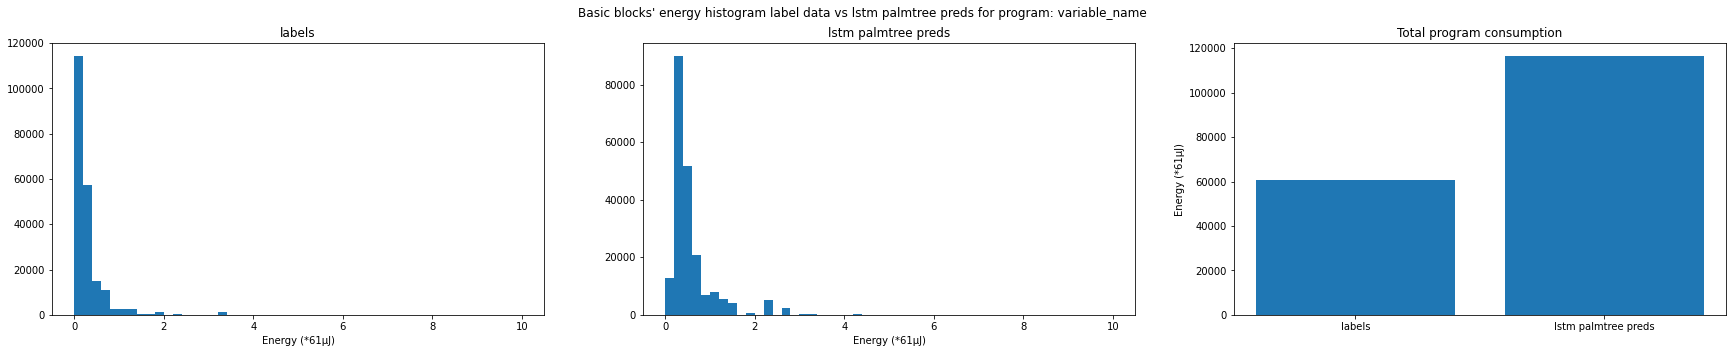

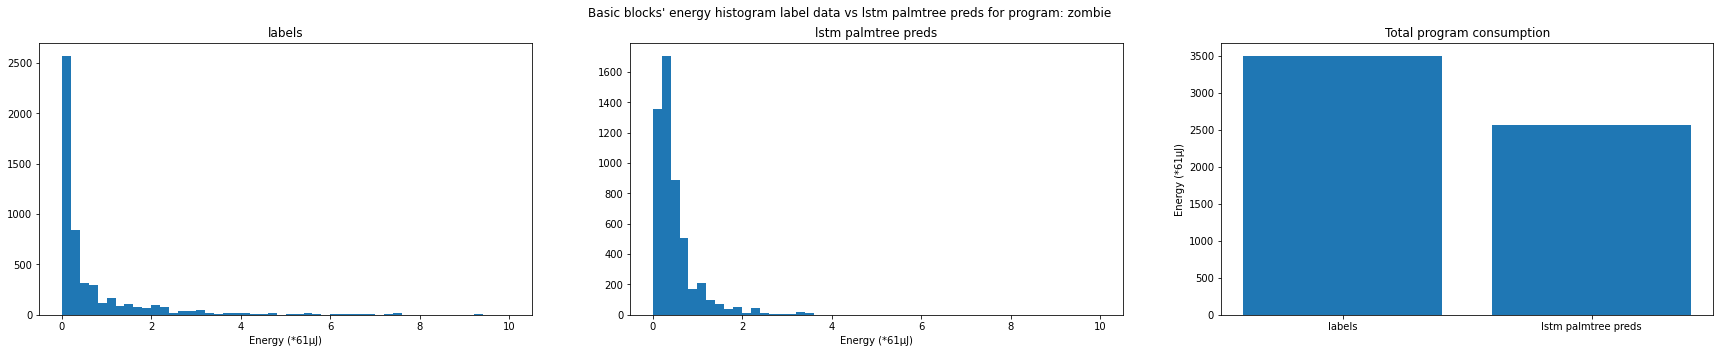

In [7]:
for benchmark in benchmarks:
    fig, axs = plt.subplots(1, 3, figsize=(30, 5))
    plt.suptitle(f"Basic blocks' energy histogram label data vs lstm palmtree preds for program: {benchmark}")
    axs[0].hist(results_dict[benchmark]["labels"], range=(0, 10), bins=50)
    axs[0].set_title('labels')
    axs[0].set_xlabel('Energy (*61μJ)')
    axs[1].hist(results_dict[benchmark]["lstm_palmtree_preds"], range=(0, 10), bins=50)
    axs[1].set_title('lstm palmtree preds')
    axs[1].set_xlabel('Energy (*61μJ)')
    axs[2].bar(["labels", "lstm palmtree preds"], [sum(results_dict[benchmark]["labels"]), sum(results_dict[benchmark]["lstm_palmtree_preds"])])
    axs[2].set_title('Total program consumption')
    axs[2].set_ylabel('Energy (*61μJ)')
    plt.show()

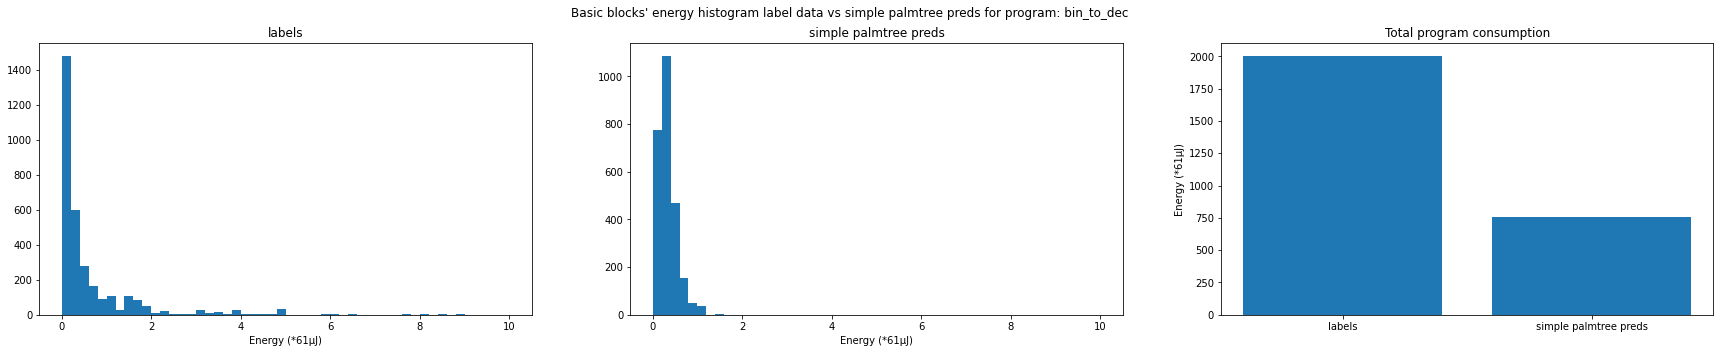

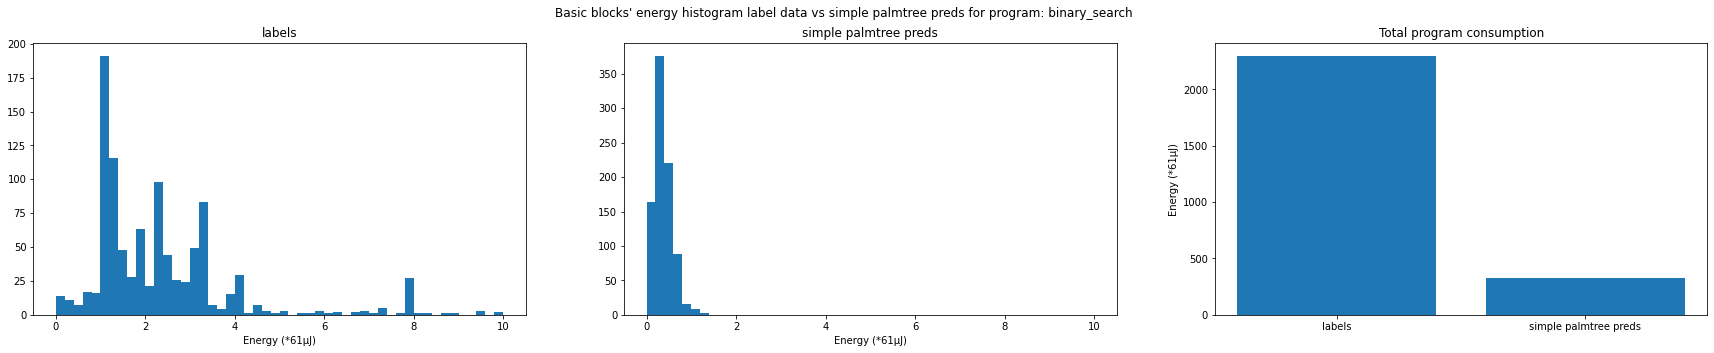

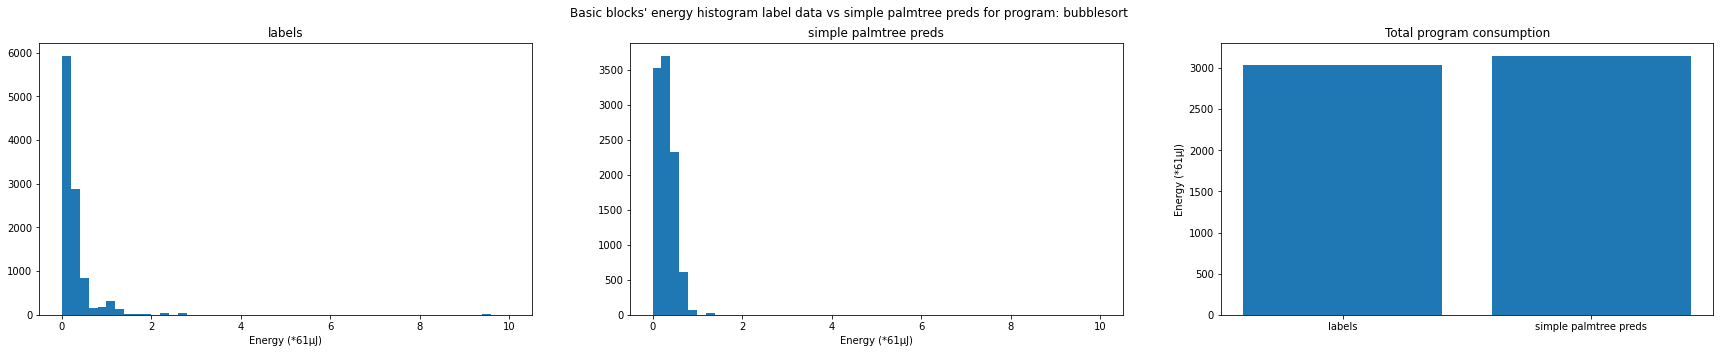

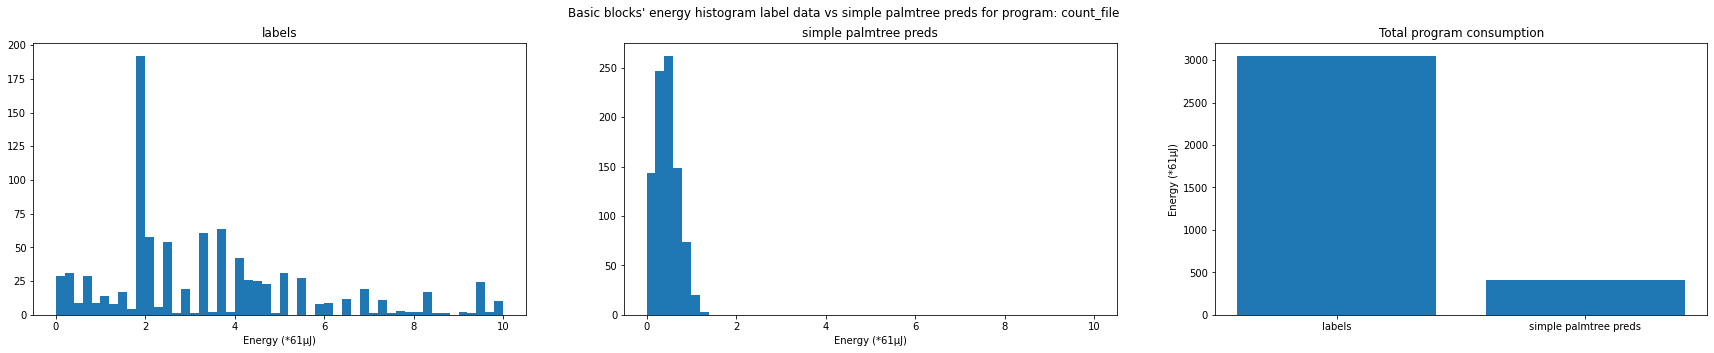

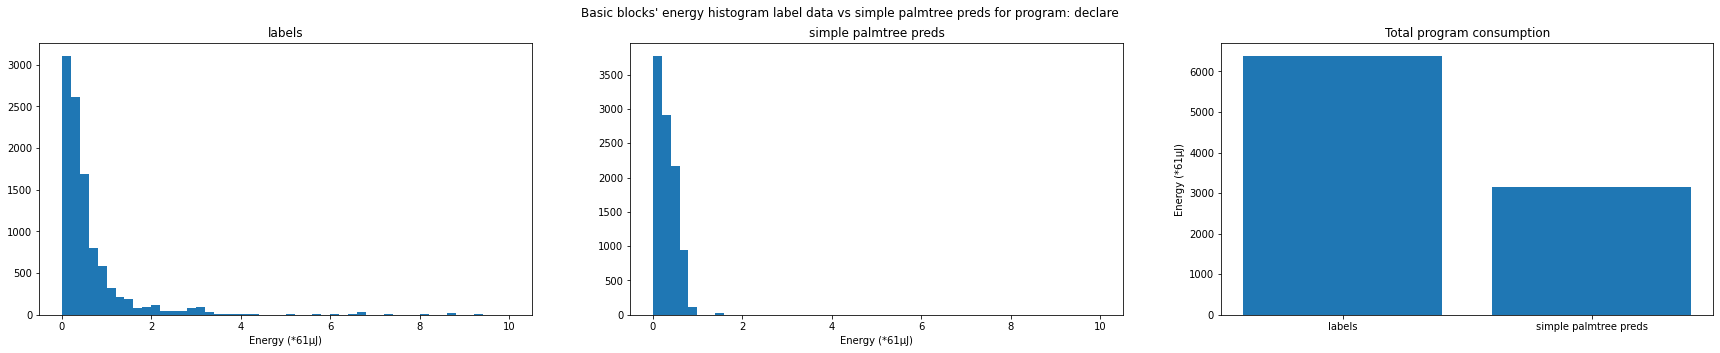

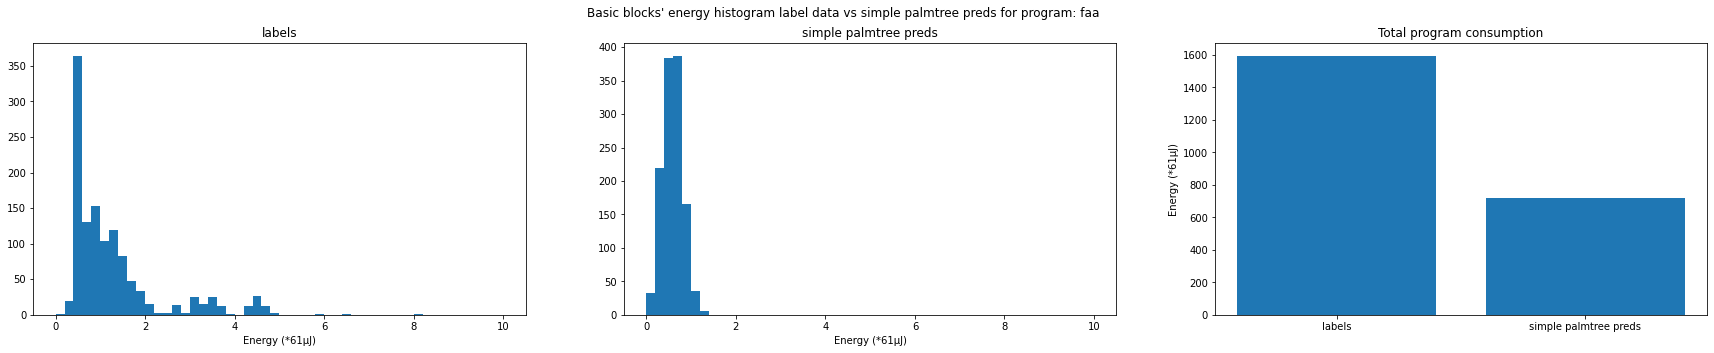

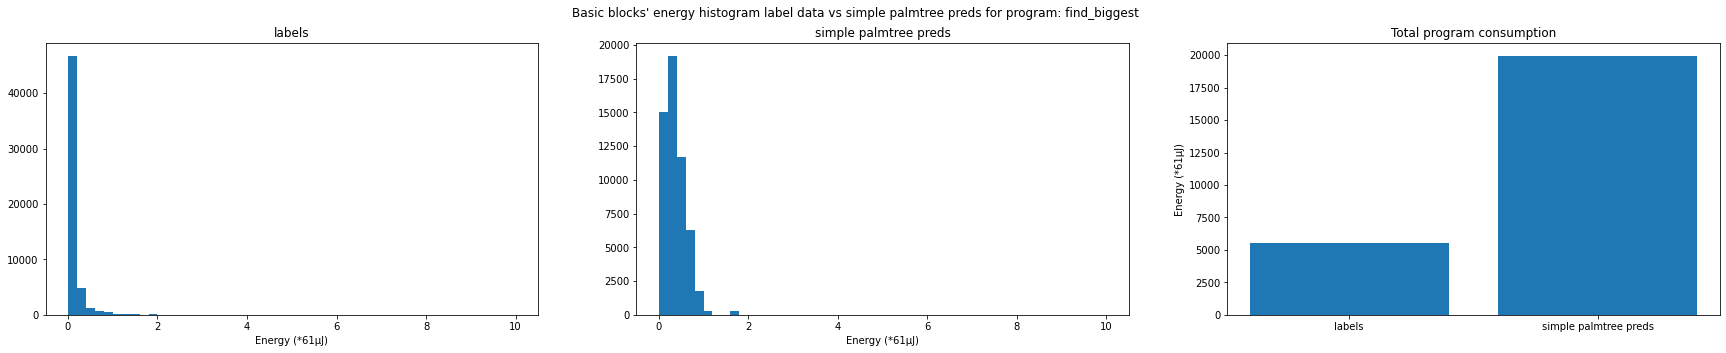

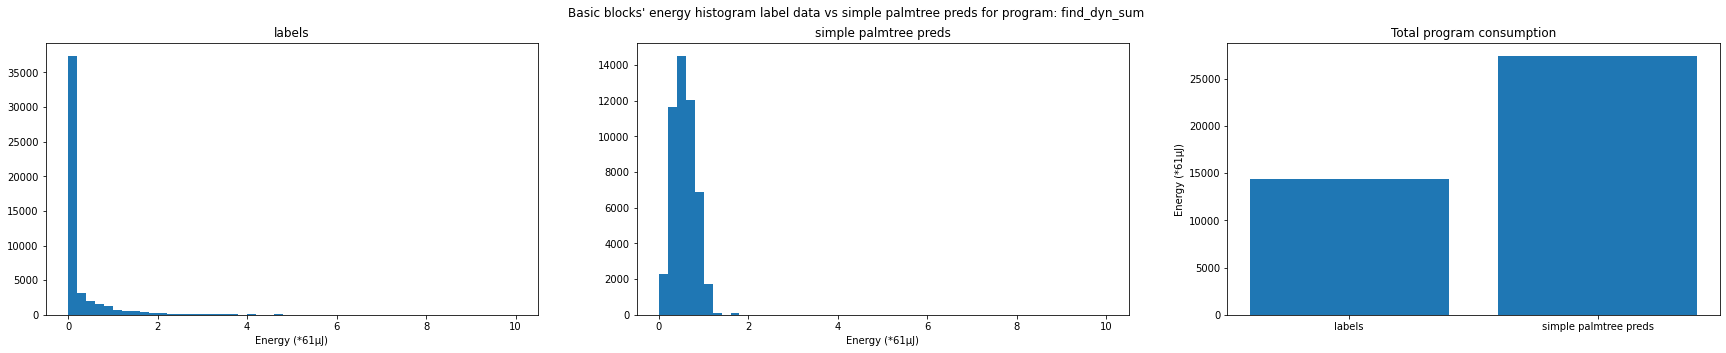

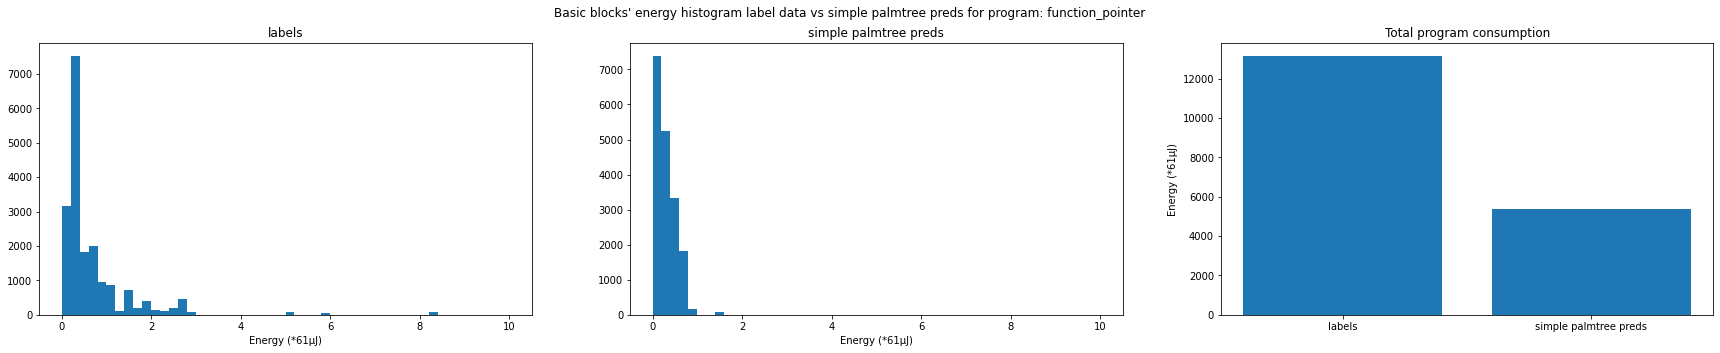

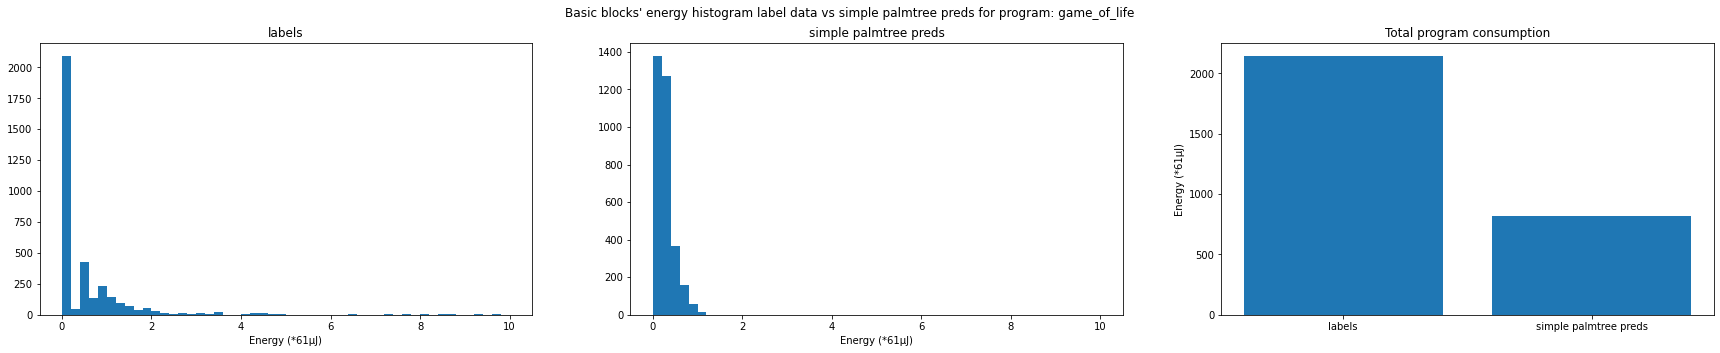

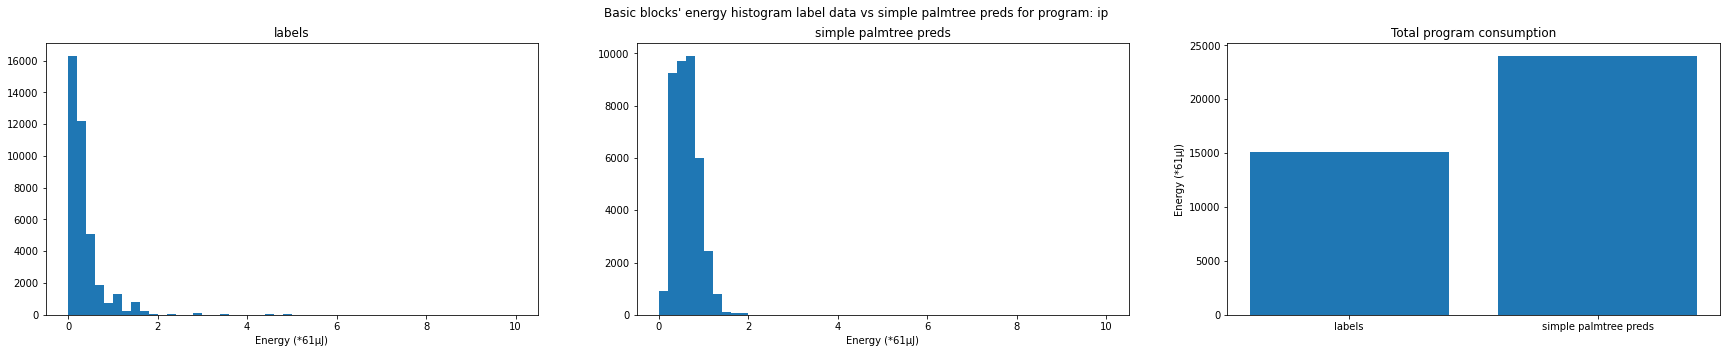

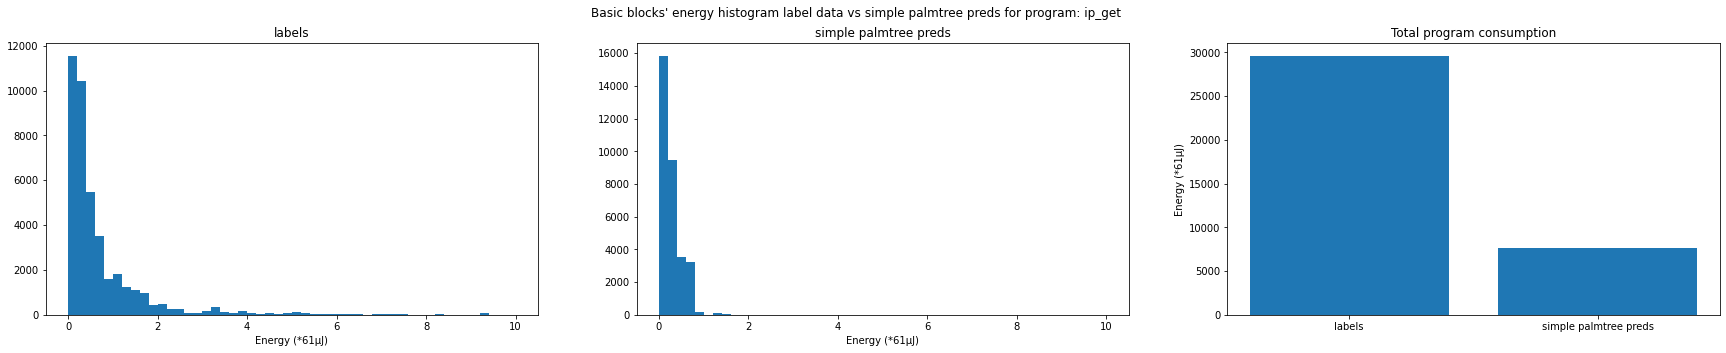

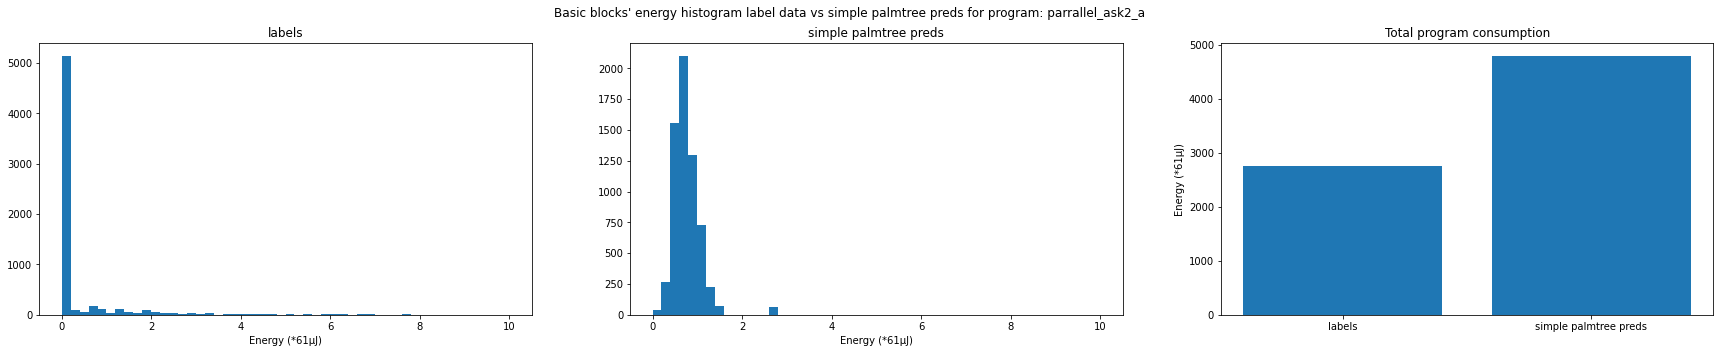

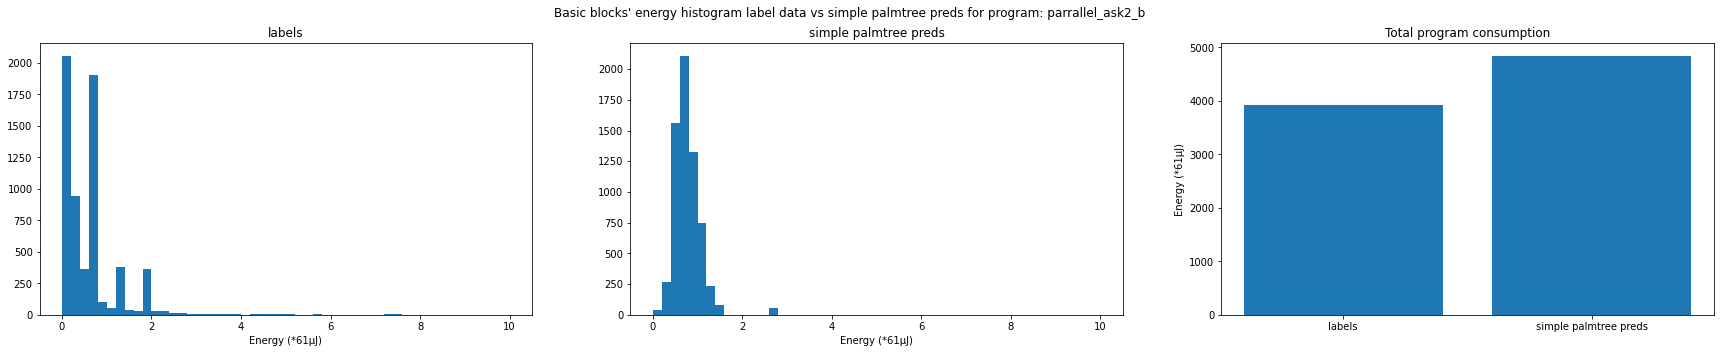

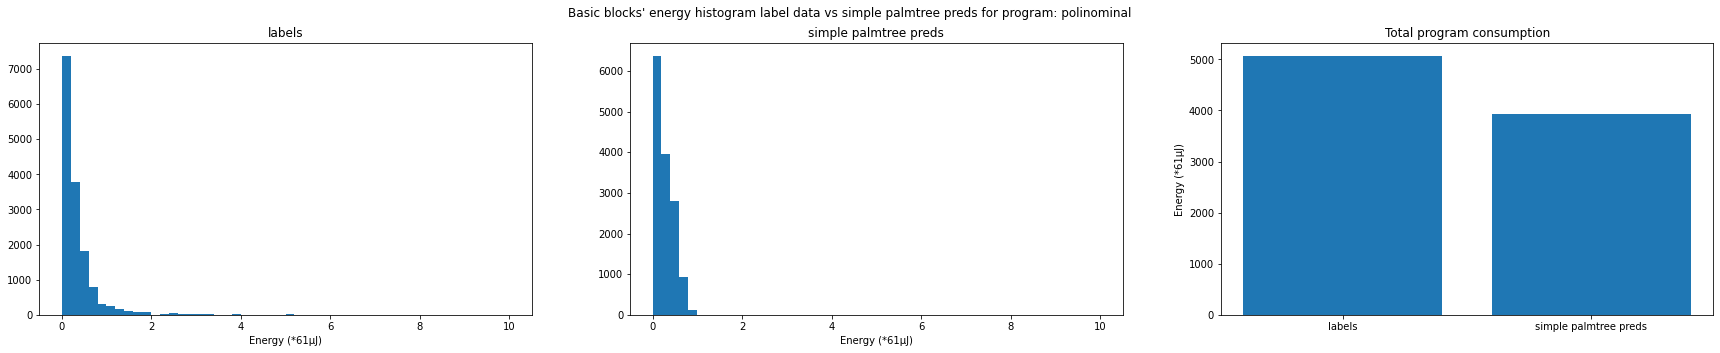

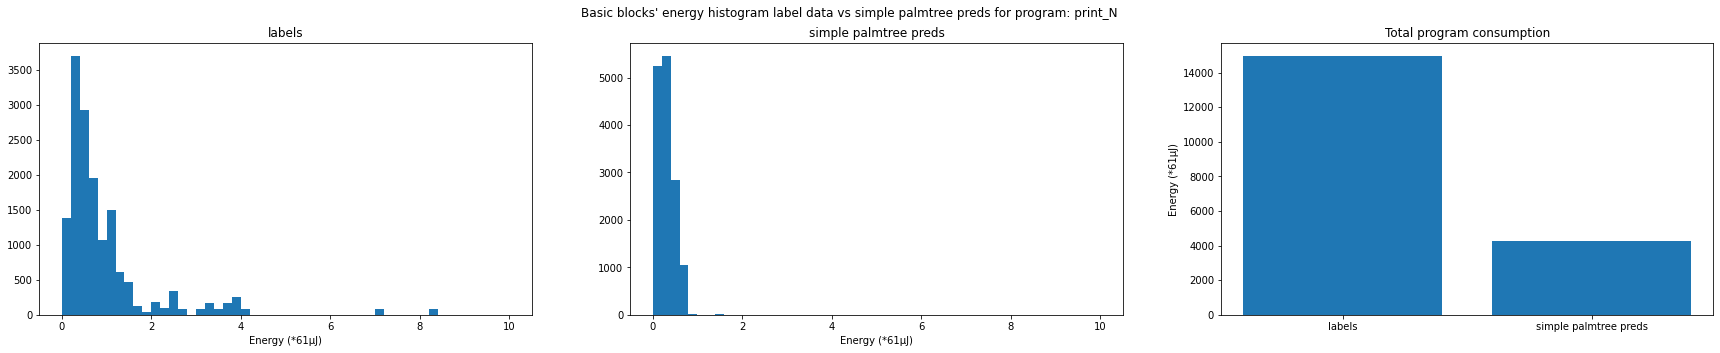

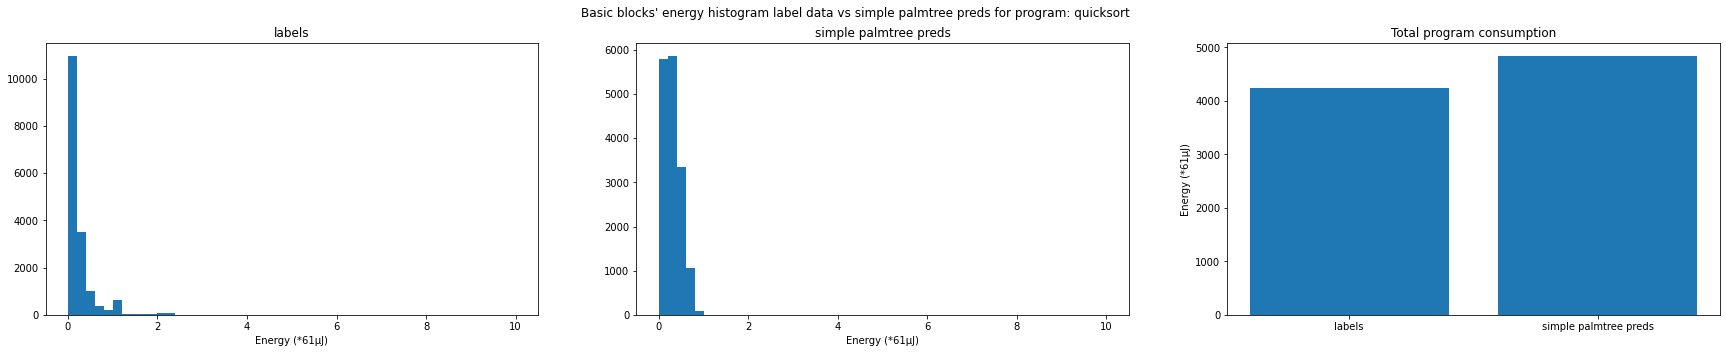

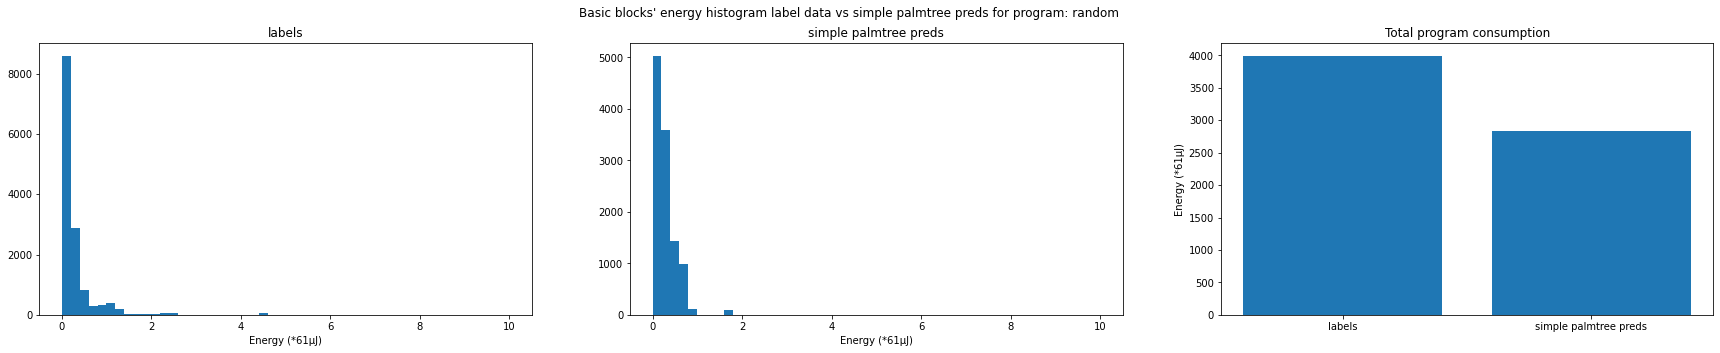

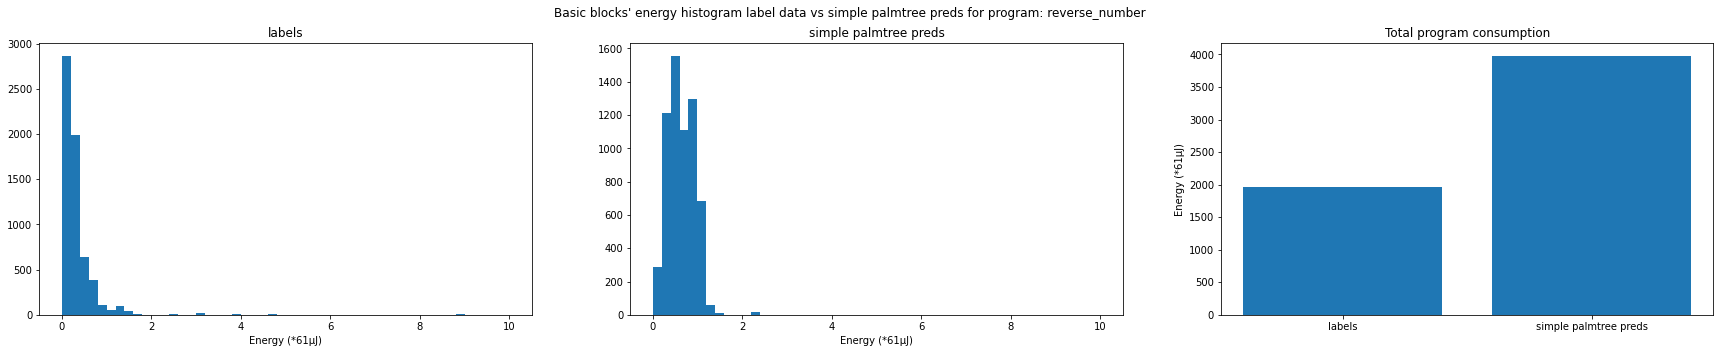

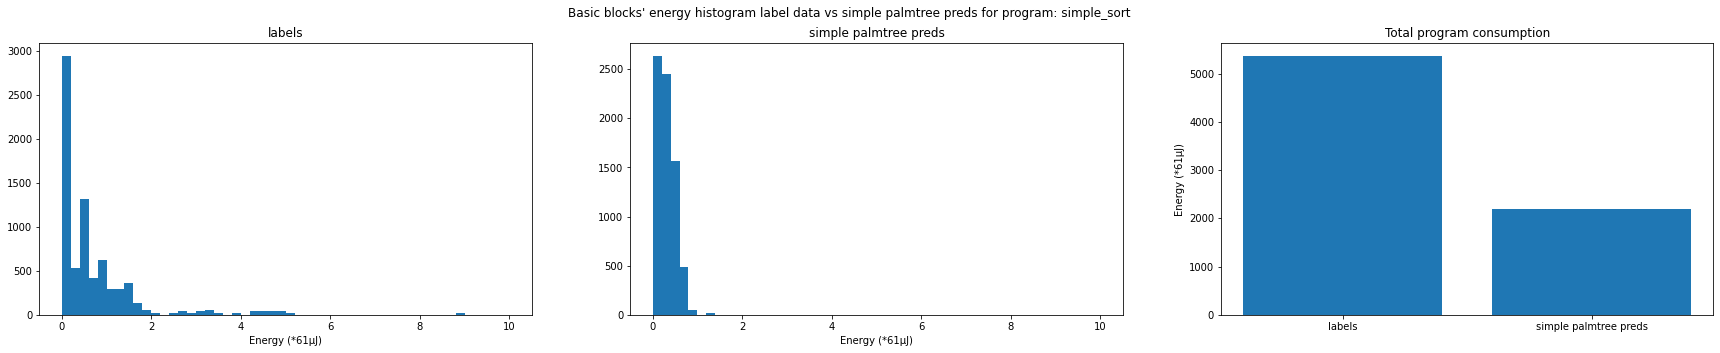

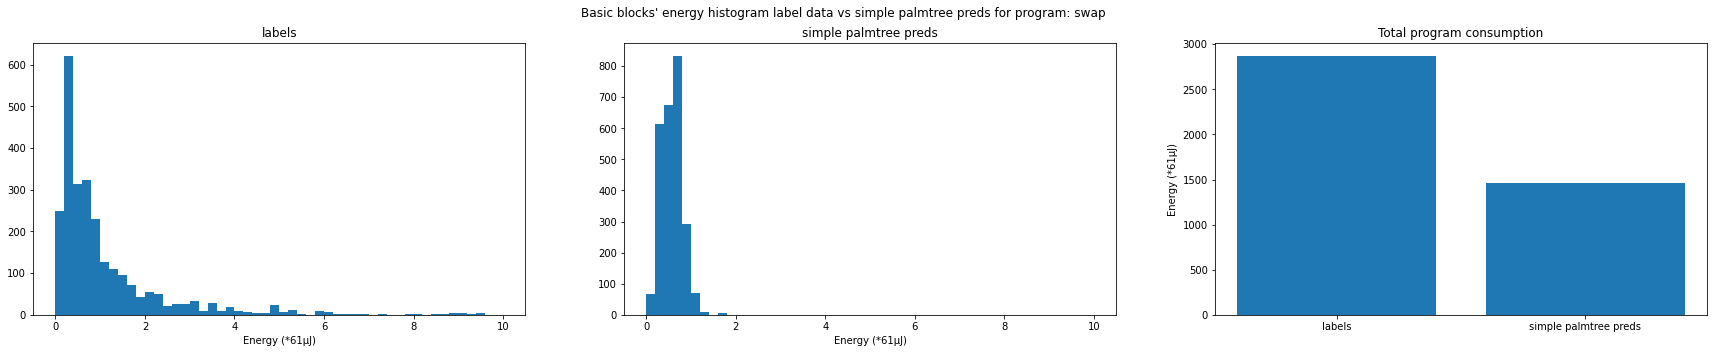

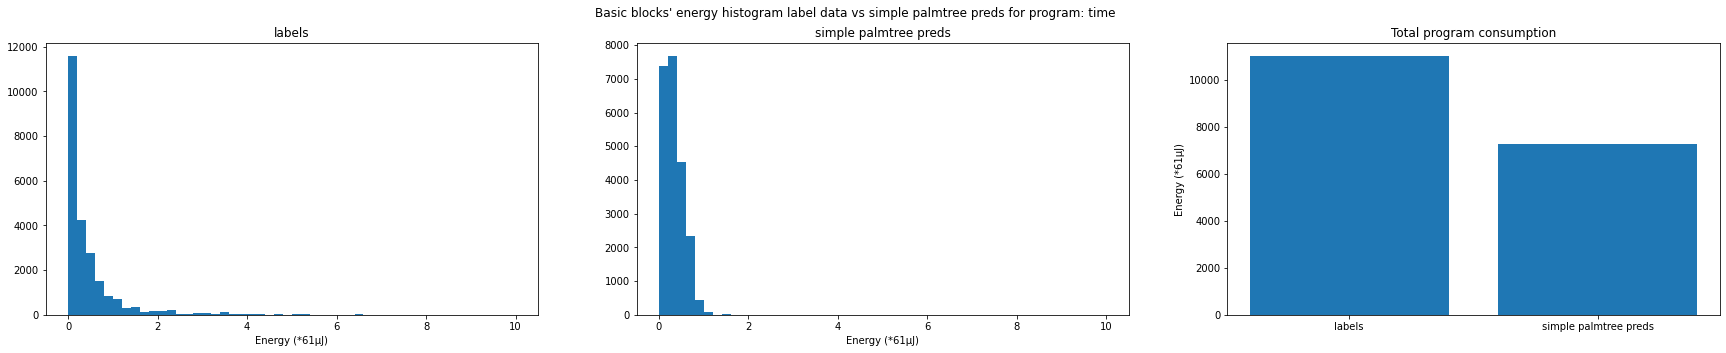

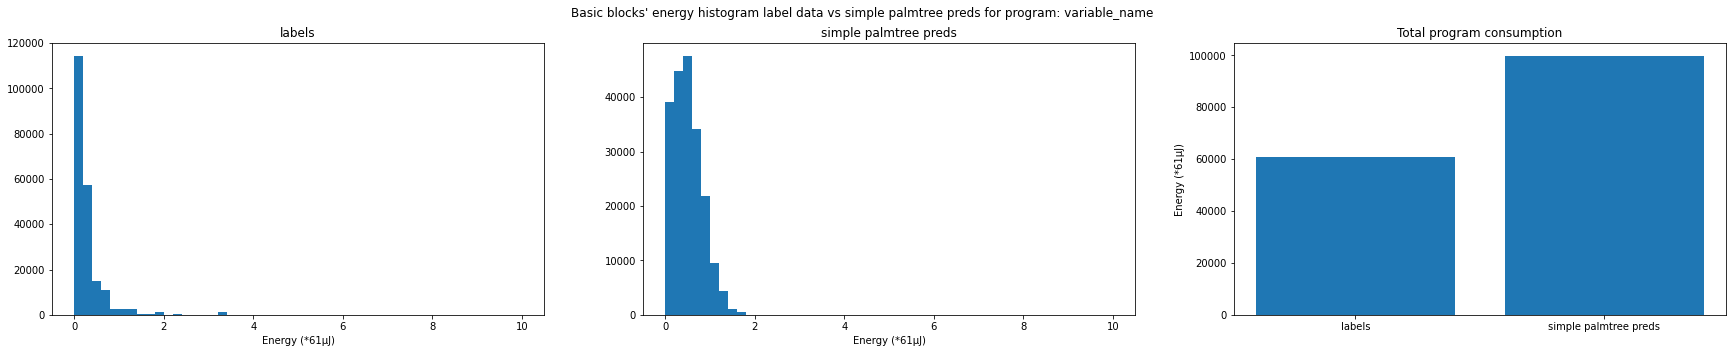

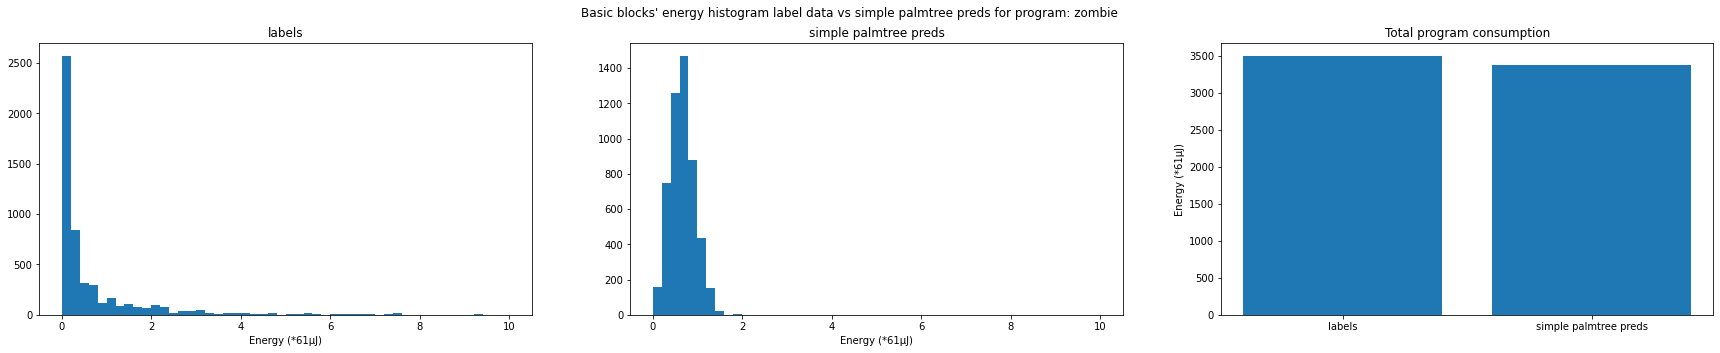

In [8]:
for benchmark in benchmarks:
    fig, axs = plt.subplots(1, 3, figsize=(30, 5))
    plt.suptitle(f"Basic blocks' energy histogram label data vs simple palmtree preds for program: {benchmark}")
    axs[0].hist(results_dict[benchmark]["labels"], range=(0, 10), bins=50)
    axs[0].set_title('labels')
    axs[0].set_xlabel('Energy (*61μJ)')
    axs[1].hist(results_dict[benchmark]["simple_palmtree_preds"], range=(0, 10), bins=50)
    axs[1].set_title('simple palmtree preds')
    axs[1].set_xlabel('Energy (*61μJ)')
    axs[2].bar(["labels", "simple palmtree preds"], [sum(results_dict[benchmark]["labels"]), sum(results_dict[benchmark]["simple_palmtree_preds"])])
    axs[2].set_title('Total program consumption')
    axs[2].set_ylabel('Energy (*61μJ)')
    plt.show()